# STROKE PREDICTION

IMPORT CRUCIAL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

IMPORTING CSV AS DATAFRAME.

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

DATA EXPLORATION

In [3]:
# Display first 20 records 

df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Display last 20 records 

df.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5090,4211,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5091,6369,Male,59.00,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5092,56799,Male,76.00,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5093,32235,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5096,41512,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.00,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [5]:
# Display statistical summary
# (age,hypertension,avg_glucose_level, mean>median so r.s. skewed)

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Display Datatyes, No. of columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Display the null values
# bmi has 201 null values

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Display duplicate values
# There are no duplicate values

df.duplicated().sum()

0

In [9]:
# Display unique values

df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

EXPLORATORY DATA    ANALYSIS


In [10]:
# Drop "id" column as it does not contribute the data

df.drop(["id"],axis=1,inplace=True)

In [11]:
# Display the number of value counts in gender
# Gender is classified into three groups ie (Female,Male and Other)
# As Other has only one value replace it with Female  

df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
# Segregating the three groups using get dummies

pd.get_dummies(df["gender"])

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [13]:
# Replacing "other" with female as female has more counts

df["gender"].replace("Other","Male",inplace=True)

In [14]:
# Display the number of value counts in gender 

df["gender"].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [15]:
# Deal with the 201 null values in bmi using SimpleImputer
# Null-values are more than  

from sklearn.impute import SimpleImputer

si=SimpleImputer(missing_values=np.nan,strategy="mean")

df[["bmi"]]=si.fit_transform(df[["bmi"]])

In [16]:
# Null values in bmi are eliminated

df["bmi"].isnull().sum()

0

In [17]:
# Segregating Numerical and Categorical data

Numcol=df.select_dtypes(["int64","float64"]).columns

Catcol=df.select_dtypes(["object"]).columns

In [18]:
Numcol

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [19]:
Catcol

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

VISUALIZATION (UNIVARIATE, BIVARIATE AND MULTIVARIATE)

<AxesSubplot:ylabel='Density'>

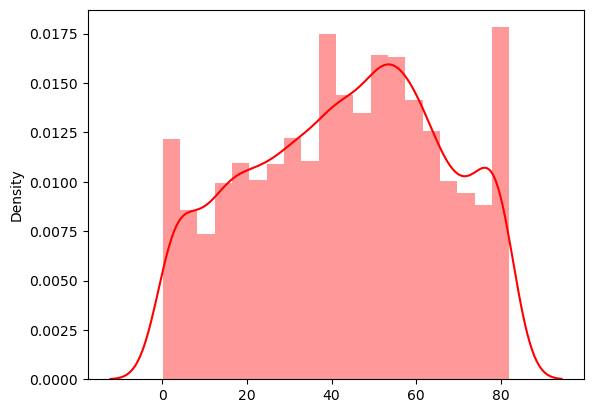

In [20]:
sns.distplot(x = df['age'], color="red")

Accordingly, the displot illustrate that the people suffering from stroke problems fall under a age catagory of 40 to 60 and old age people above 80

<AxesSubplot:xlabel='stroke', ylabel='count'>

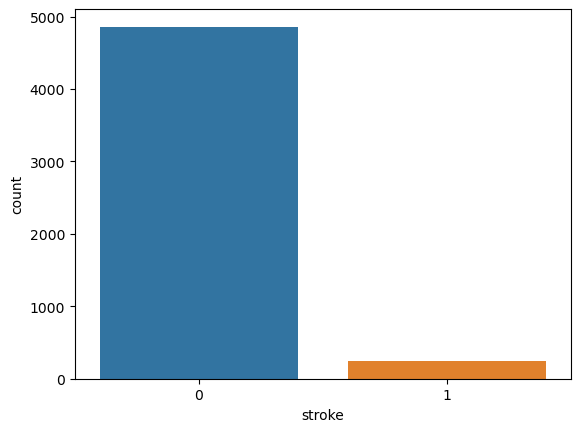

In [21]:
sns.countplot(df['stroke'])

The countplot shows that the possiblity of strokes occuring is substantially more when compared to not having stroke.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

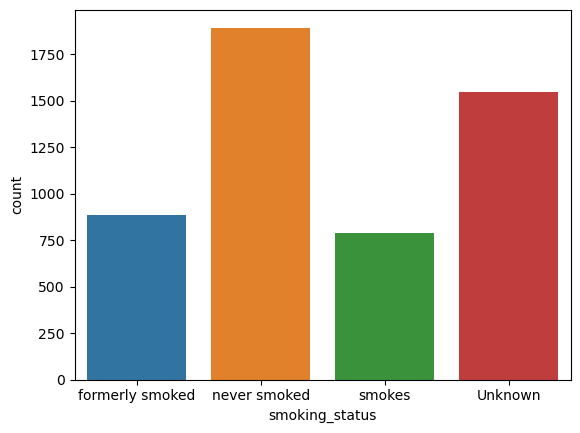

In [22]:
sns.countplot(df['smoking_status'])

The barplot shows that around 800-900 people quit smoking while 750 are still smokers. On the other hand significant amount of people never smokes and rest were unknown.

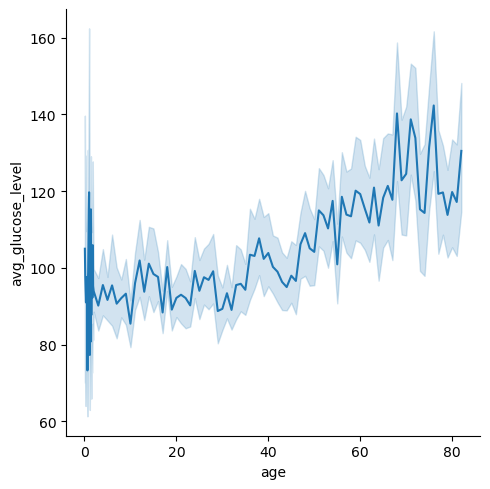

In [23]:
sns.relplot(data=df, x="age", y="avg_glucose_level", kind="line")

As can be seen, age and avg glucose level are directly proportional.

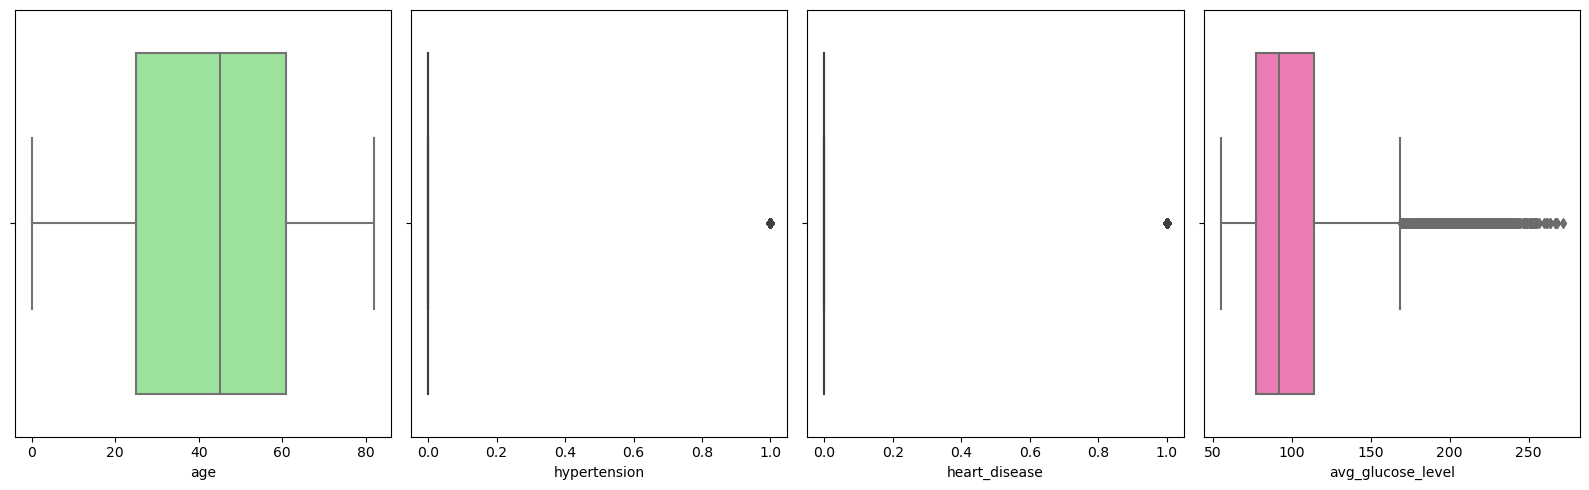

In [24]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['age'],color='lightgreen')
plt.subplot(142)
sns.boxplot(df['hypertension'])
plt.subplot(143)
sns.boxplot(df['heart_disease'])
plt.subplot(144)
sns.boxplot(df['avg_glucose_level'],color='hotpink')
plt.tight_layout()
plt.show()

from the above boxplot outliers are clearly visible

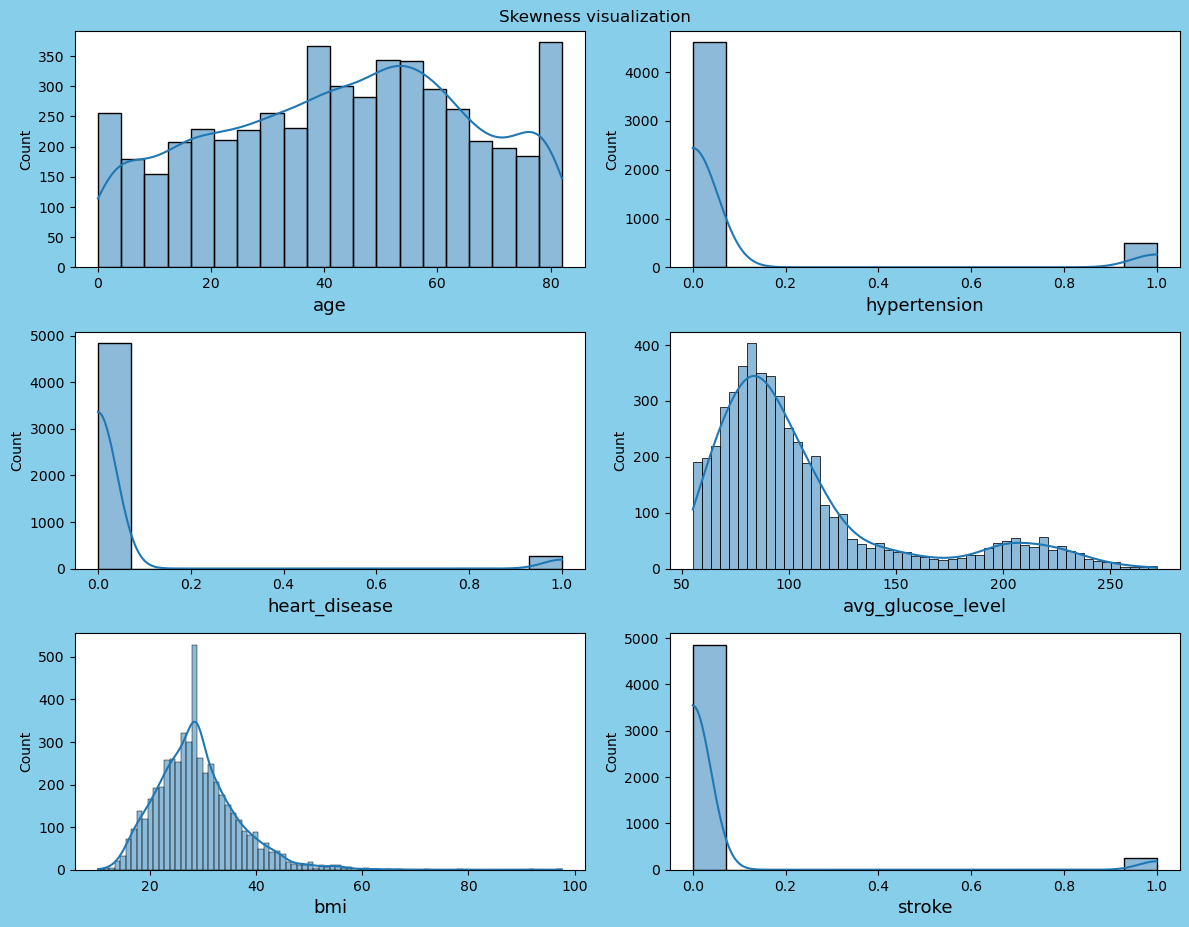

In [25]:
plt.figure(figsize=(12,12),facecolor="skyblue")
plt.suptitle("Skewness visualization")
pltn=1
for i in Numcol:
    if pltn<=10:
        ax=plt.subplot(4,2,pltn)
        
        sns.histplot(df[i],kde=True)
        plt.xlabel(i,fontsize=13)
    pltn=pltn+1
plt.tight_layout()

From the above graph it is clear that the data is not normally distributed as its right side skewed and contain outliers

<AxesSubplot:>

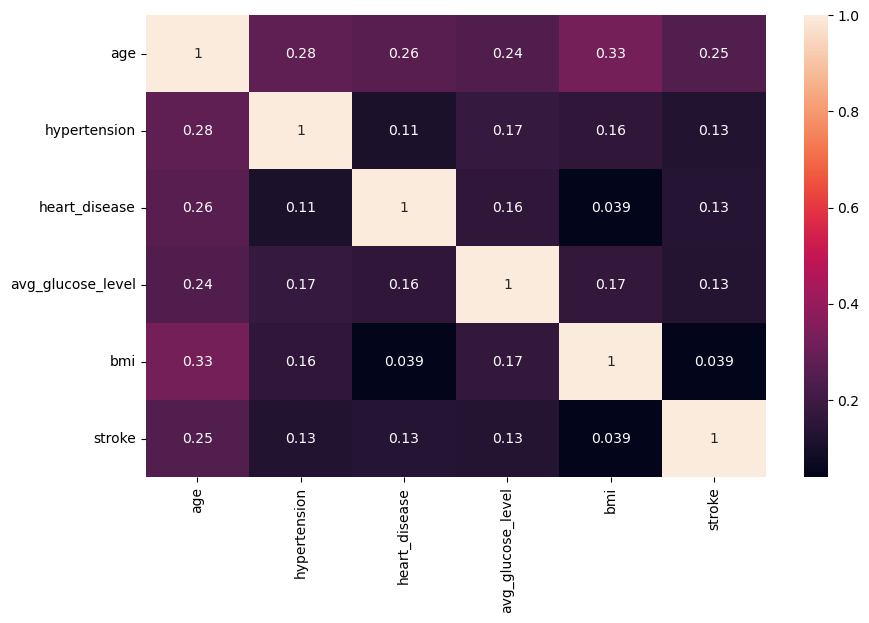

In [26]:
# Display coorelation with target

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

As can be seen there is no strong corelation due to data being not normally distributed 

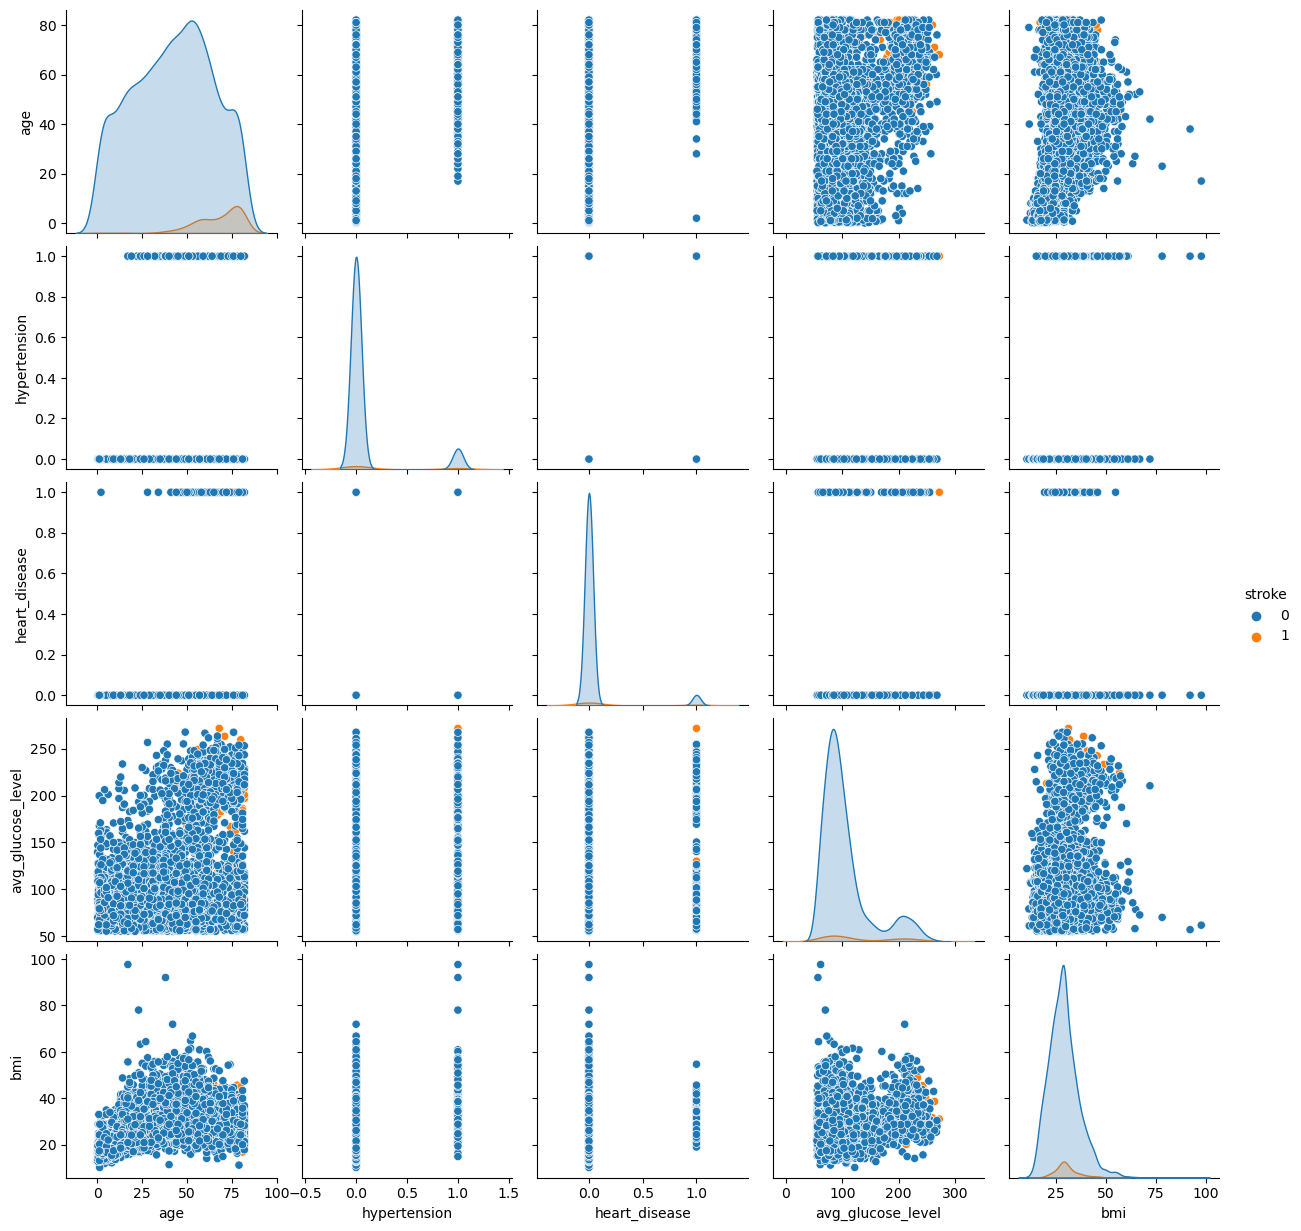

In [27]:
# Multivariate visualization

sns.pairplot(df,hue="stroke")

In [28]:
# Display skewness
# 

df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.076716
stroke               4.193284
dtype: float64

In [29]:
# Coverting categorical data to numerical using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']]=oe.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']])

In [30]:
# Seperating dependent and independent variables features(x)/target(y)

x=df.drop("stroke",axis=1)

y=df["stroke"]

In [31]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.893237,2.0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.000000,2.0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.600000,2.0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.600000,1.0


In [32]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [33]:
# Train Test split to split the dataset   estimate the performance 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

IMPLEMENTING LOGISTIC REGRESSION

In [34]:
# As target is classification 

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [35]:
# probability estimating 

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy: {ac*100}\n {cm}\n{cr}")

Accuracy: 94.45531637312459
 [[1448    2]
 [  83    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



<AxesSubplot:>

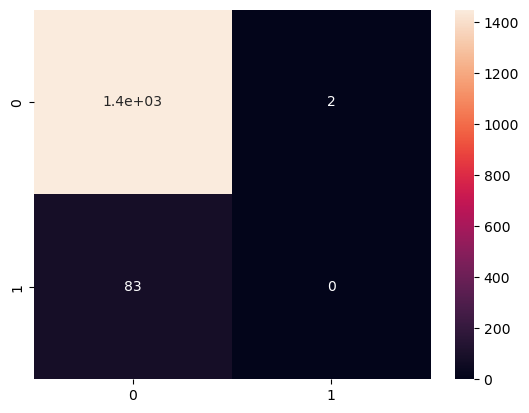

In [36]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [37]:
# Display traing and testing accuracy

train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"Training score: {train*100}\nTesting score: {test*100}")


Training score: 95.35923958624547
Testing score: 94.45531637312459


IMPLEMENTING NAIVE BAYES GAUSSION AS TARGET IS IN BINARY FORM

In [38]:
# As the target is in binary using gaussian nb

from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)

In [39]:
# # probability estimating 

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy: {ac*100}\n {cm}\n{cr}")

Accuracy: 87.01891715590345
 [[1298  152]
 [  47   36]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1450
           1       0.19      0.43      0.27        83

    accuracy                           0.87      1533
   macro avg       0.58      0.66      0.60      1533
weighted avg       0.92      0.87      0.89      1533



<AxesSubplot:>

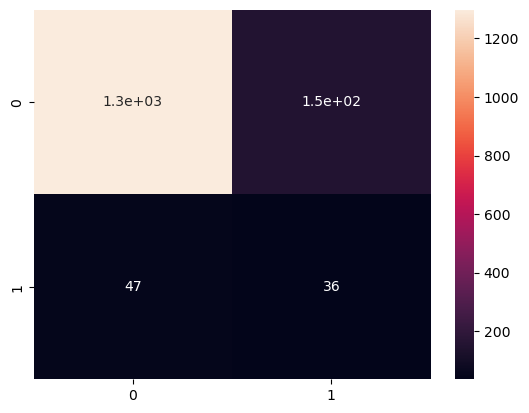

In [40]:
# Confusion matrix through heatmap

sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [41]:
# # Display traing and testing accuracy

train=gb.score(xtrain,ytrain)
test=gb.score(xtest,ytest)
print(f"Training score: {train*100}\nTesting score: {test*100}")

Training score: 87.50349454850434
Testing score: 87.01891715590345


IMPLEMENTING KNN CLASSIFIER

In [42]:
# Classification Accuracy

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [43]:
# probability estimating 

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy: {ac*100}\n {cm}\n{cr}")

Accuracy: 93.9334637964775
 [[1440   10]
 [  83    0]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.92      1533



In [44]:
# Display traing and testing accuracy

train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(f"Training score: {train*100}\nTesting score: {test*100}")

Training score: 95.44310875034945
Testing score: 93.9334637964775


REMOVING OUTLIERS

In [45]:
# Importing zscore 

from scipy.stats import zscore

features=df[["hypertension","heart_disease","avg_glucose_level","bmi"]] 
z=np.abs(zscore(features)) 
z.head()

,hypertension,heart_disease,avg_glucose_level,bmi
0,0.328602,4.185032,2.706375,1.001234e+00
1,0.328602,0.238947,2.121559,4.615554e-16
2,0.328602,4.185032,0.005028,4.685773e-01
3,0.328602,0.238947,1.437358,7.154182e-01
4,3.043196,0.238947,1.501184,6.357112e-01


In [46]:
# Removing outliers using z-score

newdf=df[(z<=3).all(axis=1)] 
newdf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.000000,1.0,1
7,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.800000,2.0,1
8,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.893237,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0.0,4.0,0.0,103.08,18.600000,0.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.000000,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.600000,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.600000,1.0,0


In [47]:
df.shape

(5110, 11)

In [48]:
newdf.shape

(4326, 11)

In [49]:
# Data lost calculation

dtloss=((5110-4326)/5110)*100  
dtloss

15.342465753424658

In [50]:
# Display skewness

newdf.skew()

gender               0.395042
age                  0.015629
hypertension         0.000000
heart_disease        0.000000
ever_married        -0.468334
work_type           -0.254953
Residence_type      -0.029602
avg_glucose_level    1.749650
bmi                  0.526752
smoking_status       0.022828
stroke               5.165614
dtype: float64

In [51]:
# # Seperating dependent and independent variables features(x)/target(y)

x=newdf.drop("stroke",axis=1)
y=newdf["stroke"]

In [52]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.000000,1.0
7,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.800000,2.0
8,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.893237,0.0
...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0.0,4.0,0.0,103.08,18.600000,0.0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.000000,2.0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.600000,2.0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.600000,1.0


In [53]:
y

1       1
3       1
5       1
7       1
8       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4326, dtype: int64

AFTER OUTLIERS REMOVAL APPLYING LOGISTIC REGRESSION

In [54]:
# To divide our dataset in training and tersting dataset

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [55]:
# Model implementation and object creation

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [56]:
# probability estimating 

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy: {ac*100}\n {cm}\n{cr}")

Accuracy: 96.61016949152543
 [[1254    0]
 [  44    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1254
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1298
   macro avg       0.48      0.50      0.49      1298
weighted avg       0.93      0.97      0.95      1298



In [57]:
# Calculating traing and testing data

train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"Training score: {train*100}\nTesting score: {test*100}")

Training score: 96.63143989431968
Testing score: 96.61016949152543


NAIVE BAYES

In [58]:
# As target is binary so gaussian algorithm

from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)

In [59]:
# probability estimating 

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy: {ac*100}\n {cm}\n{cr}")

Accuracy: 93.37442218798151
 [[1206   48]
 [  38    6]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1254
           1       0.11      0.14      0.12        44

    accuracy                           0.93      1298
   macro avg       0.54      0.55      0.54      1298
weighted avg       0.94      0.93      0.94      1298



In [60]:
# Display Training and testing Accuracy

train=gb.score(xtrain,ytrain)
test=gb.score(xtest,ytest)
print(f"Training score: {train*100}\nTesting score: {test*100}")

Training score: 93.75825627476883
Testing score: 93.37442218798151


KNN

In [61]:
# Claasification Algorithm

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [62]:
# probability estimating 

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy: {ac*100}\n {cm}\n{cr}")

Accuracy: 96.37904468412944
 [[1251    3]
 [  44    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1254
           1       0.00      0.00      0.00        44

    accuracy                           0.96      1298
   macro avg       0.48      0.50      0.49      1298
weighted avg       0.93      0.96      0.95      1298



In [63]:
# Display traing and testing accuracy

train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(f"Training score: {train*100}\nTesting score: {test*100}")

Training score: 96.79656538969617
Testing score: 96.37904468412944


Logistic Regression is the best algorithm for this dataset with accuracy of 
Training:- 96.63
Testing:-  96.61

In [64]:
import pickle 

pickle.dump(lr,open('stroke.pkl','wb'))

In [65]:
newdf.nunique()

gender                  2
age                   104
hypertension            1
heart_disease           1
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3423
bmi                   372
smoking_status          4
stroke                  2
dtype: int64

In [66]:
Catcol

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [67]:
newdf['smoking_status'].value_counts()

2.0    1565
0.0    1432
1.0     696
3.0     633
Name: smoking_status, dtype: int64

In [68]:
Numcol

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [69]:
newdf['bmi'].value_counts()

28.893237    126
28.700000     37
23.400000     33
25.100000     33
27.600000     33
            ... 
50.500000      1
40.700000      1
46.800000      1
50.400000      1
14.900000      1
Name: bmi, Length: 372, dtype: int64

In [70]:
newdf.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.000000,1.0,1
7,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.800000,2.0,1
8,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.893237,0.0,1
